In [0]:
import numpy as np

In [0]:
np.random.seed(34)

In [0]:
import keras

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense

In [0]:
from keras.optimizers import SGD

In [0]:
import matplotlib.pyplot as plt

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
y_train.shape

(60000,)

In [0]:
X = X_train[101].reshape([28,28])

In [0]:
plt.gray()

<Figure size 432x288 with 0 Axes>

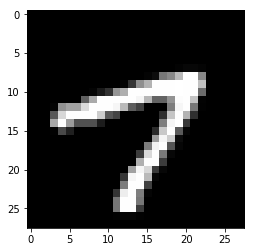

In [0]:
plt.imshow(X)

In [0]:
y_train[101]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [0]:
X_test.shape

(10000, 28, 28)

In [0]:
y_test.shape

(10000,)

In [0]:
type(X_train[0])

numpy.ndarray

In [0]:
X_train = X_train.reshape(60000, 784).astype('float32')

In [0]:
X_test =X_test.reshape(10000, 784).astype('float32')

In [0]:
X_train /=255

In [0]:
X_test /=255

In [0]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
n_classes =10

In [0]:
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [0]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#model = Sequential()
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(784,))

In [0]:
#model.add(Dense(64, activation='tanh', input_shape=(784,)))
#hidden1 = Dense(64, activation='tanh')(inputs)
#hidden2 = Dense(32, activation='tanh')(hidden1)


hidden1 = Dense(64, activation='tanh')(inputs)
hidden2 = Dense(32, activation='tanh')(inputs)
merge =  keras.layers.concatenate([hidden1, hidden2], axis=-1)

In [0]:
#model.add(Dense(10, activation='softmax'))
prediction = Dense(10,activation='softmax')(merge)
model = Model(inputs=inputs, outputs=prediction)

In [0]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [0]:
784*64 + 64

50240

In [0]:
64*10 +10

650

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=1),metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, batch_size=10000,epochs=200,verbose=1, 
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 0s 8us/step - loss: 2.0950 - acc: 0.2939 - val_loss: 2.5574 - val_acc: 0.3263
Epoch 2/200
60000/60000 [==============================] - 0s 3us/step - loss: 2.3820 - acc: 0.3449 - val_loss: 1.3975 - val_acc: 0.5339
Epoch 3/200
60000/60000 [==============================] - 0s 3us/step - loss: 1.5048 - acc: 0.5150 - val_loss: 0.8702 - val_acc: 0.7444
Epoch 4/200
60000/60000 [==============================] - 0s 4us/step - loss: 0.7630 - acc: 0.7562 - val_loss: 0.7059 - val_acc: 0.7503
Epoch 5/200
60000/60000 [==============================] - 0s 4us/step - loss: 0.5817 - acc: 0.8092 - val_loss: 0.5786 - val_acc: 0.7959
Epoch 6/200
60000/60000 [==============================] - 0s 4us/step - loss: 0.5514 - acc: 0.8201 - val_loss: 0.4055 - val_acc: 0.8861
Epoch 7/200
60000/60000 [==============================] - 0s 3us/step - loss: 0.4152 - acc: 0.8789 - val_loss: 0.4548 - val_acc

In [0]:
np.round(model.predict(X_test[:5]))

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)